In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
import random
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data_8_1 = ["/content/drive/MyDrive/DL_project/8jap+1eng_col_caps_test_new/A", "/content/drive/MyDrive/DL_project/8jap+1eng_col_caps_test_new/B"]

# Train A and B

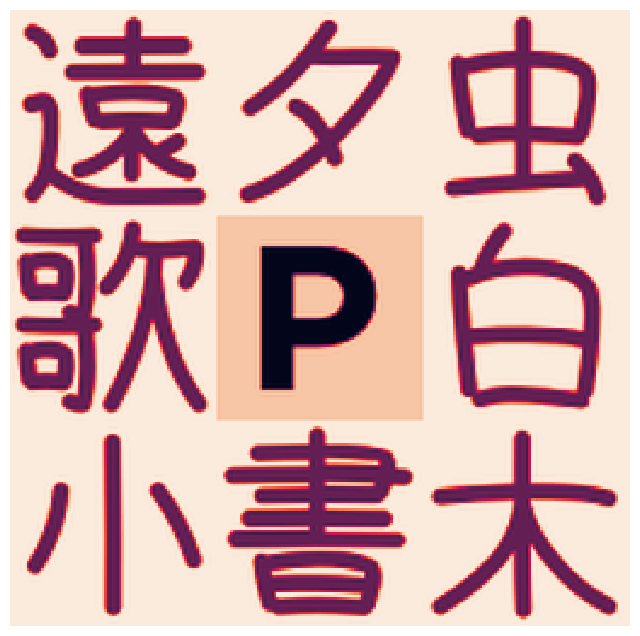

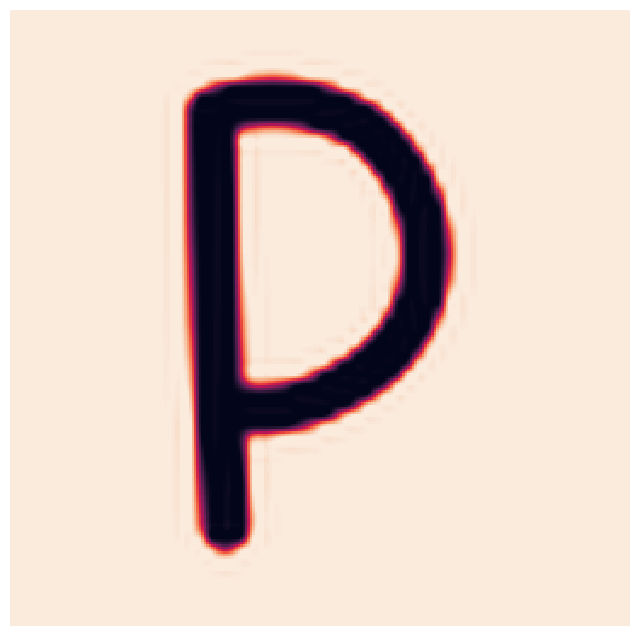

In [ ]:
for path in data_8_1:
  image_list = os.listdir(os.path.join(path, 'train'))
  image_train = Image.open(os.path.join(path, 'train/9199.png'))
  image_array_train = np.array(image_train)

  plt.figure(figsize=(8, 8))
  sns.heatmap(np.mean(image_array_train, axis=2), annot=False, cbar=False)
  plt.axis('off')  # Hide the axis
  plt.show()

# Test A and B

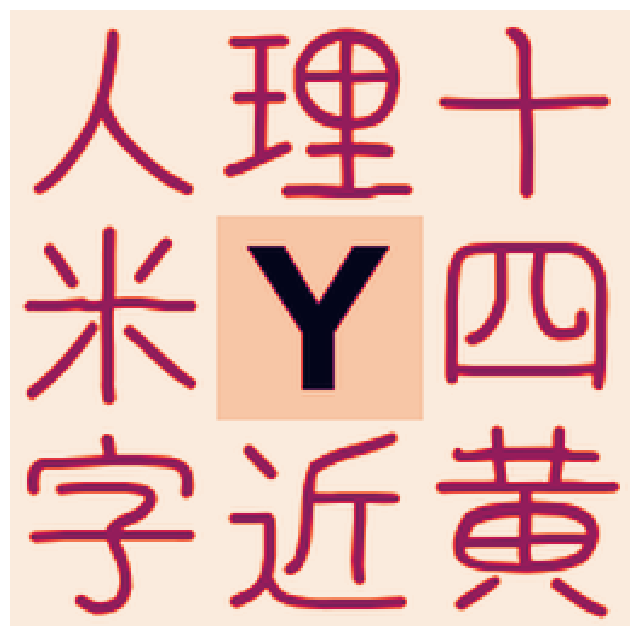

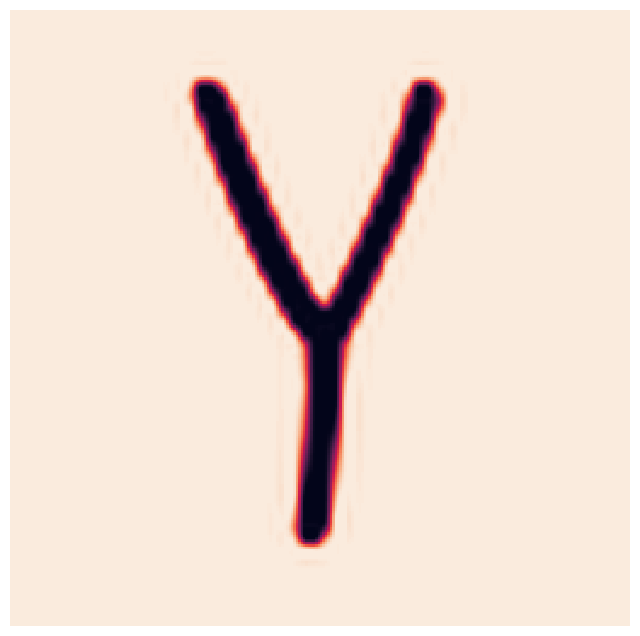

In [ ]:
for path in data_8_1:
  image_list = os.listdir(os.path.join(path, 'test'))
  image_train = Image.open(os.path.join(path, 'test/52.png'))
  image_array_train = np.array(image_train)
  plt.figure(figsize=(8, 8))
  sns.heatmap(np.mean(image_array_train, axis=2), annot=False, cbar=False)
  plt.axis('off')  # Hide the axis
  plt.show()

## Generating Pairs
We provide a python script to generate training data in the form of pairs of images {A,B}, where A and B are two different depictions of the same underlying scene. For example, these might be pairs {label map, photo} or {bw image, color image}. Then we can learn to translate A to B or B to A:

## Training data

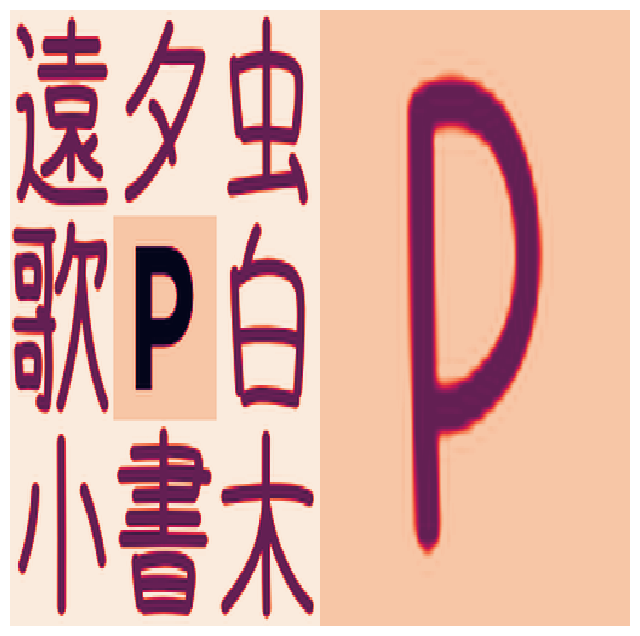

In [ ]:
combined_AB = "/content/drive/MyDrive/DL_project/pakka_final_dataset/"
image_train = Image.open(os.path.join(combined_AB, 'train/9199.png'))
image_array_train = np.array(image_train)

plt.figure(figsize=(8, 8))
sns.heatmap(np.mean(image_array_train, axis=2), annot=False, cbar=False)
plt.axis('off')  # Hide the axis
plt.show()

# Testing Data

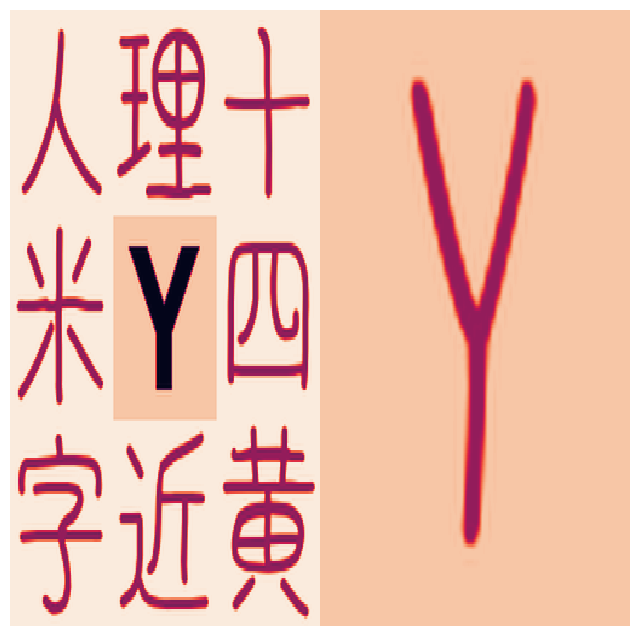

In [ ]:
combined_AB = "/content/drive/MyDrive/DL_project/pakka_final_dataset/"
image_train = Image.open(os.path.join(combined_AB, 'test/52.png'))
image_array_train = np.array(image_train)

plt.figure(figsize=(8, 8))
sns.heatmap(np.mean(image_array_train, axis=2), annot=False, cbar=False)
plt.axis('off')  # Hide the axis
plt.show()

# Distribution of training and test data


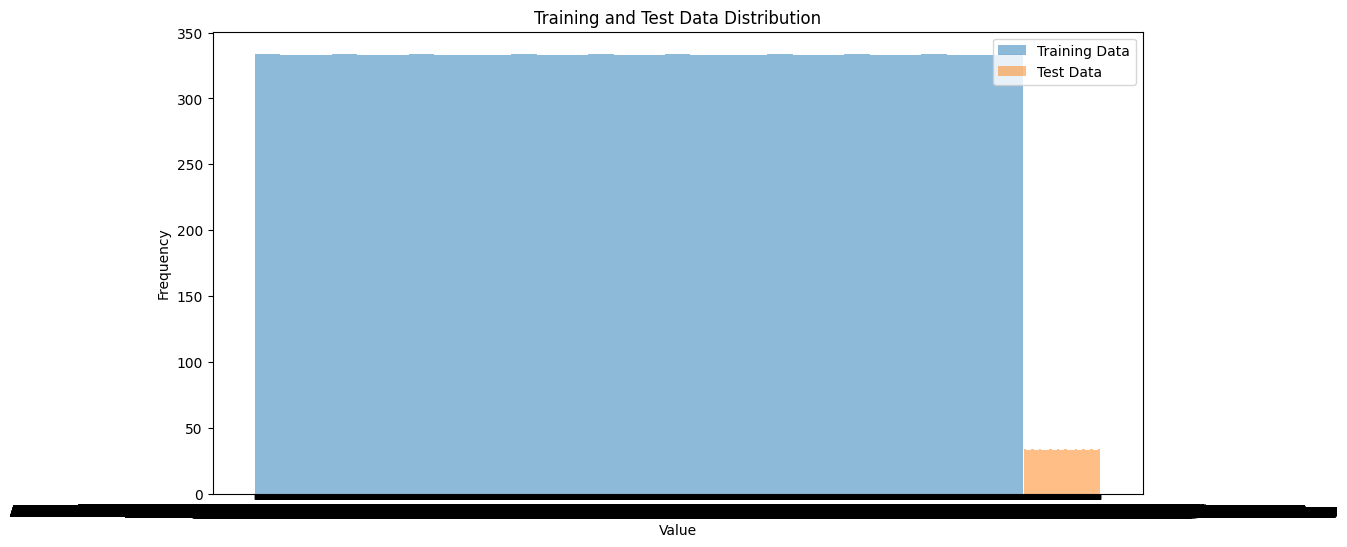

In [ ]:
# Create histograms of the training and test data
training_data = [os.path.join(combined_AB+"train", file) for file in os.listdir(combined_AB+"train")]
test_data = [os.path.join(combined_AB+"test", file) for file in os.listdir(combined_AB+"test")]
plt.figure(figsize=(12, 6))

plt.hist(training_data, bins=30, alpha=0.5, label='Training Data')
plt.hist(test_data, bins=30, alpha=0.5, label='Test Data')

# Add title and labels
plt.title('Training and Test Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

# Install

In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2513, done.
remote: Total 2513 (delta 0), reused 0 (delta 0), pack-reused 2513
Receiving objects: 100% (2513/2513), 8.20 MiB | 11.08 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.


In [ ]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.6/248.6 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.8 MB/s eta 0:00:00
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408194 sha256=3b72bd61a9e357986c96a76b3819c4273ed20a569abd03dfa6e461cb2ae7de1b
  Stored in directory: /root/.cache/pip/wheels/42/29/49/5bed207bac4578e4d2c0c5fc0226bfd33a7e2953ea56356855
Successfully built visdom


# Dataset Combine


# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_pix2pix_model.sh [edges2shoes, sat2map, map2sat, facades_label2photo, and day2night]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [ ]:
!bash ./scripts/download_pix2pix_model.sh facades_label2photo

bash: ./scripts/download_pix2pix_model.sh: No such file or directory


In [ ]:
!ls /content/drive/MyDrive/ml_project_gatech/DL_project/pakka_final_dataset

ls: cannot access '/content/drive/MyDrive/ml_project_gatech/DL_project/pakka_final_dataset': No such file or directory


# Subset Data

In [ ]:
import shutil

DATASET_PATH = "/content/drive/MyDrive/DL_project/pakka_final_dataset/train"
Dest_Path = "/content/drive/MyDrive/DL_project/subset/train"

for filename in os.listdir(DATASET_PATH)[:100]:
  shutil.copy2(DATASET_PATH +"/" + filename, Dest_Path)

FileNotFoundError: ignored

# Training

-   `python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. Add `--direction BtoA` if you want to train a model to transfrom from class B to A.

In [ ]:
DATASET_PATH = "/content/drive/MyDrive/DL_project/subset"
!python train.py --dataroot {DATASET_PATH} --name pix2pix_jap --model pix2pix --direction AtoB --display_id -1

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/DL_project/subset	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                

# Visualize learning per epoch

In [ ]:
from google.colab import files
!zip -r /content/viz.zip /content/pytorch-CycleGAN-and-pix2pix/checkpoints/pix2pix_jap/web
files.download("/content/viz.zip")

updating: content/pytorch-CycleGAN-and-pix2pix/checkpoints/pix2pix_jap/web/ (stored 0%)
updating: content/pytorch-CycleGAN-and-pix2pix/checkpoints/pix2pix_jap/web/index.html (deflated 96%)
updating: content/pytorch-CycleGAN-and-pix2pix/checkpoints/pix2pix_jap/web/images/ (stored 0%)
updating: content/pytorch-CycleGAN-and-pix2pix/checkpoints/pix2pix_jap/web/images/epoch012_fake_B.png (deflated 0%)
updating: content/pytorch-CycleGAN-and-pix2pix/checkpoints/pix2pix_jap/web/images/epoch022_real_B.png (deflated 1%)
updating: content/pytorch-CycleGAN-and-pix2pix/checkpoints/pix2pix_jap/web/images/epoch004_real_A.png (deflated 0%)
updating: content/pytorch-CycleGAN-and-pix2pix/checkpoints/pix2pix_jap/web/images/epoch006_real_B.png (deflated 1%)
updating: content/pytorch-CycleGAN-and-pix2pix/checkpoints/pix2pix_jap/web/images/epoch001_real_A.png (deflated 0%)
updating: content/pytorch-CycleGAN-and-pix2pix/checkpoints/pix2pix_jap/web/images/epoch021_fake_B.png (deflated 0%)
updating: content/py

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import re
file_path = '/content/pytorch-CycleGAN-and-pix2pix/checkpoints/pix2pix_jap/loss_log.txt'

with open(file_path, 'r') as file:
    lines = file.readlines()
# Parsing the data to extract relevant information
data = []

# Regular expression to match the necessary data in each line
pattern = r'\(epoch: (\d+), iters: (\d+), time: [^)]+\) G_GAN: ([\d.]+) G_L1: ([\d.]+) D_real: ([\d.]+) D_fake: ([\d.]+)'

for line in lines:
    match = re.search(pattern, line)
    if match:
        epoch, iters, g_gan, g_l1, d_real, d_fake = match.groups()
        data.append({
            'Epoch': int(epoch),
            'Iterations': int(iters),
            'G_GAN': float(g_gan),
            'G_L1': float(g_l1),
            'D_real': float(d_real),
            'D_fake': float(d_fake)
        })

# Converting the data into a DataFrame
df = pd.DataFrame(data)
df.head()


,Epoch,Iterations,G_GAN,G_L1,D_real,D_fake
0,1,100,4.081,22.759,0.013,0.028
1,1,200,3.321,36.467,0.073,0.074
2,1,300,2.764,31.912,0.045,0.103
3,1,400,2.659,21.044,0.164,0.119
4,1,500,2.410,23.299,0.040,0.515


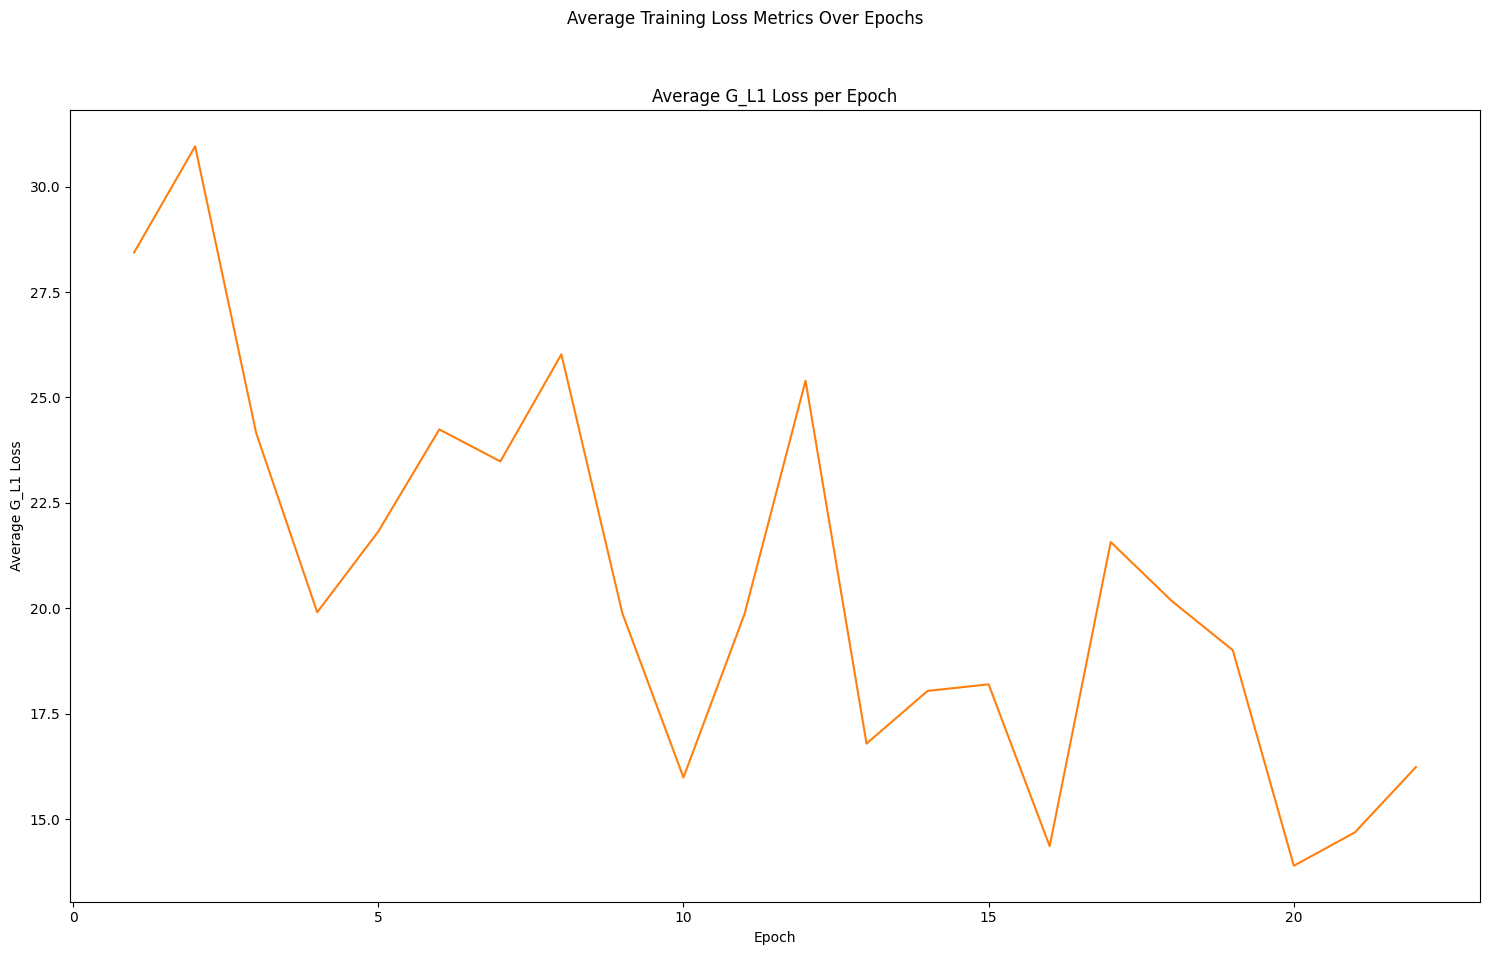

In [ ]:
# Grouping the data by epochs and averaging the loss metrics for each epoch
df_grouped = df.groupby('Epoch').mean().reset_index()

# Plotting all loss metrics across epochs
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
fig.suptitle('Average Training Loss Metrics Over Epochs')

# # G_GAN Loss
# ax[0, 0].plot(df_grouped['Epoch'], df_grouped['G_GAN'], label='G_GAN')
# ax[0, 0].set_title('Average G_GAN Loss per Epoch')
# ax[0, 0].set_xlabel('Epoch')
# ax[0, 0].set_ylabel('Average G_GAN Loss')

# G_L1 Loss
ax.plot(df_grouped['Epoch'], df_grouped['G_L1'], 'tab:orange', label='G_L1')
ax.set_title('Average G_L1 Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Average G_L1 Loss')

# # D_real Loss
# ax[1, 0].plot(df_grouped['Epoch'], df_grouped['D_real'], 'tab:green', label='D_real')
# ax[1, 0].set_title('Average D_real Loss per Epoch')
# ax[1, 0].set_xlabel('Epoch')
# ax[1, 0].set_ylabel('Average D_real Loss')

# # D_fake Loss
# ax[1, 1].plot(df_grouped['Epoch'], df_grouped['D_fake'], 'tab:red', label='D_fake')
# ax[1, 1].set_title('Average D_fake Loss per Epoch')
# ax[1, 1].set_xlabel('Epoch')
# ax[1, 1].set_ylabel('Average D_fake Loss')

# Showing the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Testing

-   `python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_pix2pix`

Change the `--dataroot`, `--name`, and `--direction` to be consistent with your trained model's configuration and how you want to transform images.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> Note that we specified --direction BtoA as Facades dataset's A to B direction is photos to labels.

> If you would like to apply a pre-trained model to a collection of input images (rather than image pairs), please use --model test option. See ./scripts/test_single.sh for how to apply a model to Facade label maps (stored in the directory facades/testB).

> See a list of currently available models at ./scripts/download_pix2pix_model.sh

In [ ]:
!ls checkpoints/

pix2pix_jap


In [ ]:
!python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_label2photo_pretrained --use_wandb

# Visualize

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/facades_label2photo_pretrained/test_latest/images/100_fake_B.png')
plt.imshow(img)

FileNotFoundError: ignored

In [ ]:
img = plt.imread('./results/facades_label2photo_pretrained/test_latest/images/100_real_A.png')
plt.imshow(img)

In [ ]:
img = plt.imread('./results/facades_label2photo_pretrained/test_latest/images/100_real_B.png')
plt.imshow(img)